# Barabasi-Albert network model

## Model implementation

In [68]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
def ba_network(N, m) :
    # Initialize with fully-connected network
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))    # Index of node labels (used for sampling)
    ks = np.zeros(N)            # Array of node degrees
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)       # Counter for total degree

    # Add t = N - m0 nodes
    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        # Add edges from new node (i) to selected nodes (ns)
        G.add_edges_from(zip([i]*m, ns))

        # Update degree array and counter
        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m
    
    return G

In [4]:
m = 3
N = 10**5

G = ba_network(N, m)

In [6]:
nx.write_gml(G, 'ba_100K.gml')

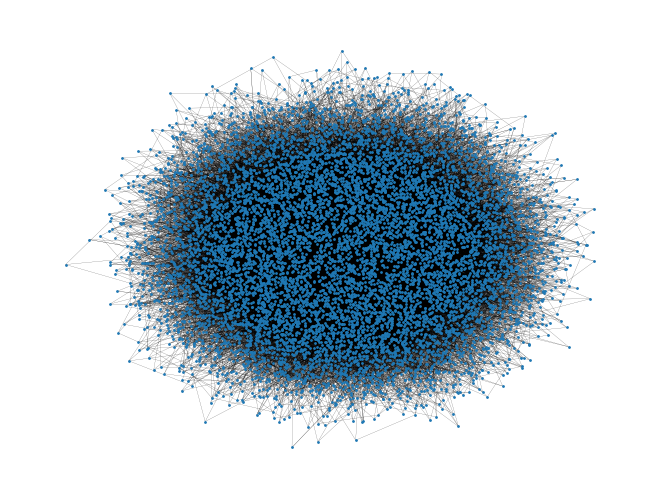

In [4]:
nx.draw(G, node_size=1, width=0.1)

In [5]:
print(f"Number of nodes: {G.number_of_nodes()}; original model: {N}")
print(f"Number of edges: {G.number_of_edges()}; original model: {(N-m) * m}") 

Number of nodes: 10000; original model: 10000
Number of edges: 29994; original model: 29991


The discrepancy in the number of edges is due to the initialization procedure. By starting with a fully-connected graph, an extra $\frac{m(m-1)}{2}$ edges are added:

In [6]:
m * (m-1) / 2

3.0

## Degree distribution

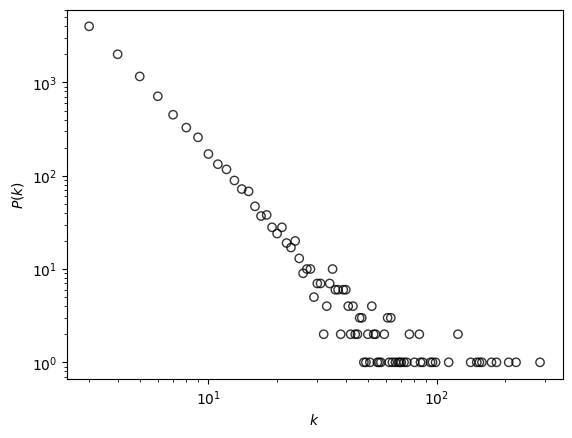

In [19]:
# Get array of degrees
ks = np.array([len(list(nx.neighbors(G, n))) for n in G])

# Get degree values and counts
degs, counts = np.unique(ks, return_counts=True)

# Plot in log-log scale
plt.scatter(degs, counts, color='none', edgecolors='black', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.xscale('log')
plt.yscale('log')

## Network visualization

In [7]:
m = 3
N = 10**3

G = ba_network(N, m)

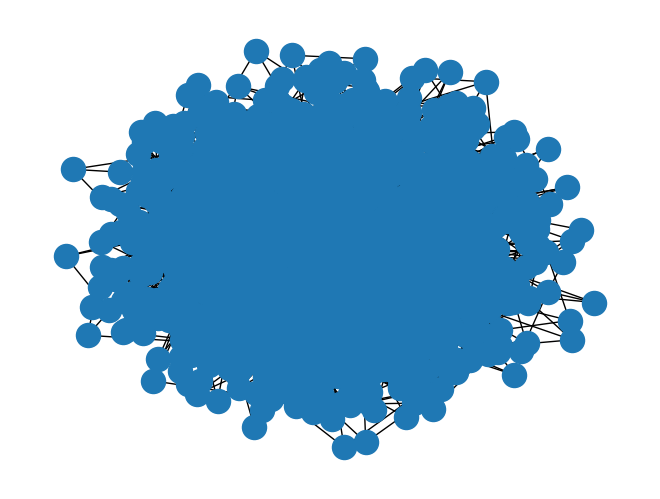

In [14]:
pos_spring = nx.spring_layout(G)

nx.draw(G, pos=pos_spring)

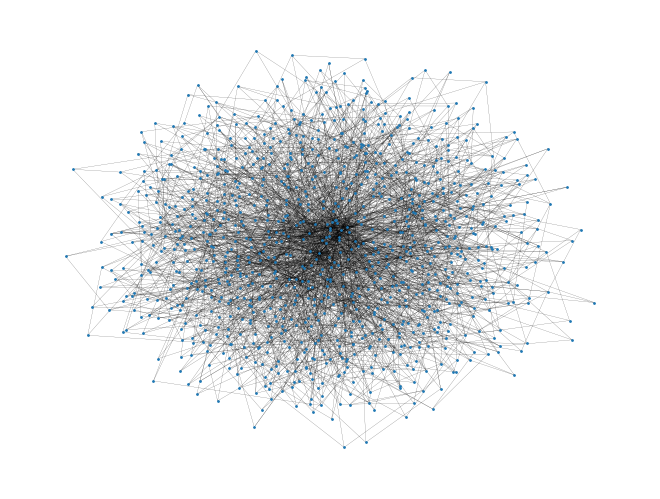

In [15]:
nx.draw(G, pos= pos_spring, node_size=1, width=0.1)

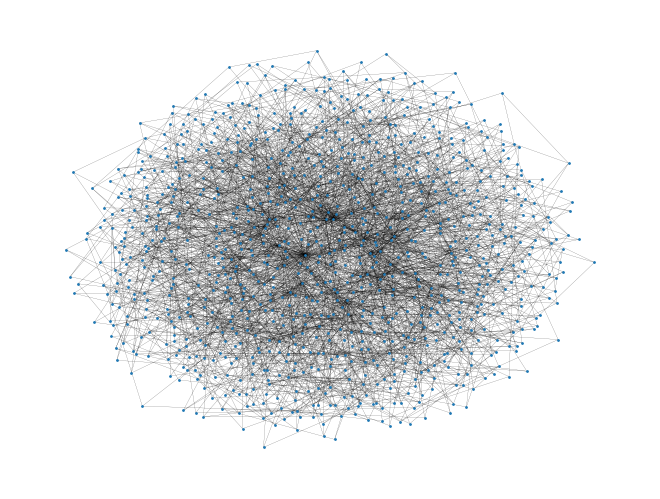

In [19]:
pos_kk = nx.kamada_kawai_layout(G)

nx.draw(G, pos=pos_kk, node_size=1, width=0.1)

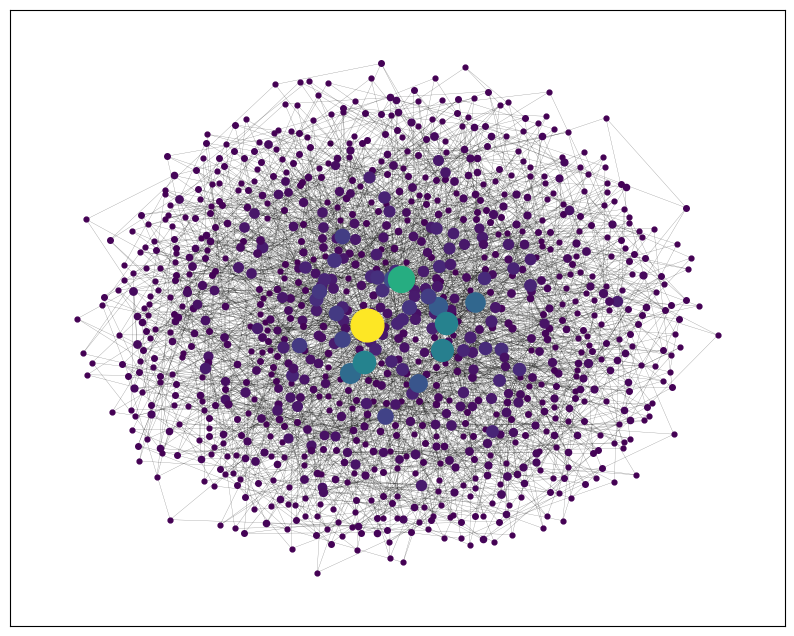

In [67]:
ks = np.array([len(list(nx.neighbors(G, n))) for n in G.nodes])
k_sum = np.sum(ks)
k_max = np.max(ks)
vmin, vmax = np.min(ks), np.max(ks)

fig, ax = plt.subplots(1, figsize=(10,8))

# Draw each node individually in order to set zorder
for node in G.nodes() :
    H = G.subgraph([node])
    collection = nx.draw_networkx_nodes(H, pos_kk, node_size=4*ks[node], node_color=ks[node], ax=ax, vmin=vmin, vmax=vmax)
    collection.set_zorder(N-node)

# nx.draw_networkx_nodes(G, pos=pos_kk, node_size=4*ks, node_color=ks, ax=ax)

nx.draw_networkx_edges(G, pos=pos_kk, width=0.2, alpha=0.5, ax=ax)

### Animation

In [135]:
def update(nodelim, G, pos, ax, step_size=1, draw_params={}):
    # ax.clear()

    H = G.subgraph(list(G.nodes())[:nodelim])
    ks = np.array([len(list(nx.neighbors(H, n))) for n in H.nodes])
    nx.draw(H, pos=pos, ax=ax, node_size=draw_scale*ks, node_color=draw_scale*ks, **draw_params)

def run_animation(G, step_lim, step_size=1, gif_filename='ani.gif', interval=200, **draw_params) :
    # Build plot
    fig, ax = plt.subplots(figsize=(10,6))

    # Add dummy nodes at edges as a workaround to fix figure boundaries
    dummy = nx.Graph()
    dummy.add_nodes_from([-1, -2])
    nx.draw(dummy, pos={-1: [-1,-1], -2: [1,1]}, alpha=0)

    # Step size defines number of time steps / nodes to add in each frame
    # Frame node limit is the index of the last node to be shown in each frame
    frame_nodelim = list(G.nodes())[:step_lim:step_size]

    ani = animation.FuncAnimation(fig, update, frames=frame_nodelim, fargs=(G, pos_kk, ax, step_size, draw_params), interval=interval, repeat_delay=5000)
    ani.save(gif_filename, writer='imagemagick')

    plt.show()

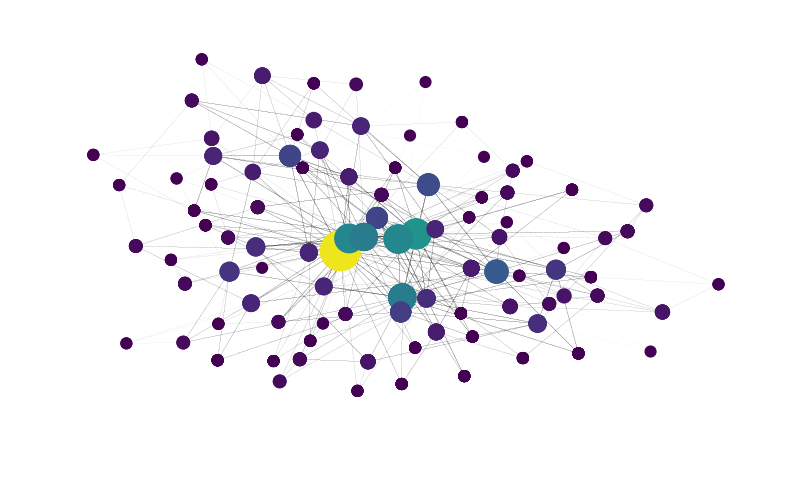

In [137]:
m = 3
N = 10**2

G = ba_network(N, m)
pos_kk = nx.spring_layout(G)
ks = np.array([len(list(nx.neighbors(G, n))) for n in G.nodes])

# nxdraw_params = dict(node_size=4, vmin=0, vmax=1, width=0.1)
draw_scale = 15
nxdraw_params = dict(vmin=draw_scale*np.min(ks), vmax=draw_scale*np.max(ks), width=0.01)
gif_filename = "ba_growth_ani.gif"

step_lim = int(N)
step_size = 2
interval = 100  # ms delay

run_animation(G, step_lim, step_size, gif_filename, interval=interval, **nxdraw_params)